In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt 
from sklearn import linear_model

In [2]:
delivery_df = pd.read_csv(r"C:\Users\Master\Documents\data science material all\delivery_time.csv")

In [3]:
delivery_df            #### importing data 

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
delivery_df.duplicated()      #### checking any duplicates

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

In [5]:
delivery_df.head()      ##### top data of file

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
delivery_df.tail()          ### bottom data of file 

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [7]:
delivery_df.info()         #### data info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


C:\Users\Master\AppData\Local\Temp\ipykernel_4312\407616176.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delivery_df['Delivery Time'])        ###creating plot for the data againt delivery time


<Axes: xlabel='Delivery Time', ylabel='Density'>

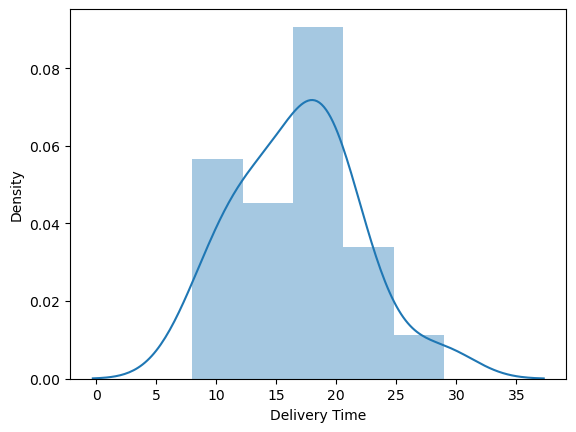

In [8]:
sns.distplot(delivery_df['Delivery Time'])        ###creating plot for the data againt delivery time 

C:\Users\Master\AppData\Local\Temp\ipykernel_4312\935405517.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delivery_df['Sorting Time'])   ## plot againt the data for sorting time


<Axes: xlabel='Sorting Time', ylabel='Density'>

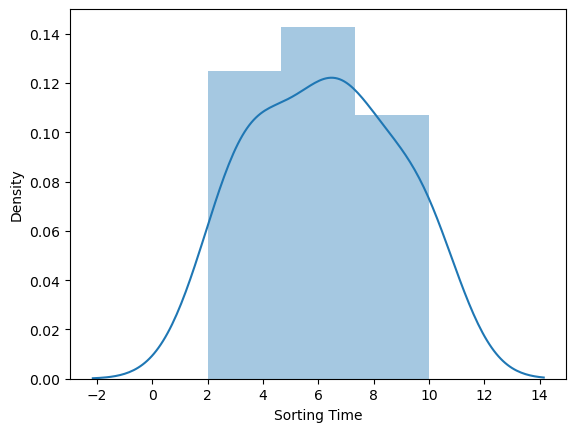

In [9]:
sns.distplot(delivery_df['Sorting Time'])   ## plot againt the data for sorting time 

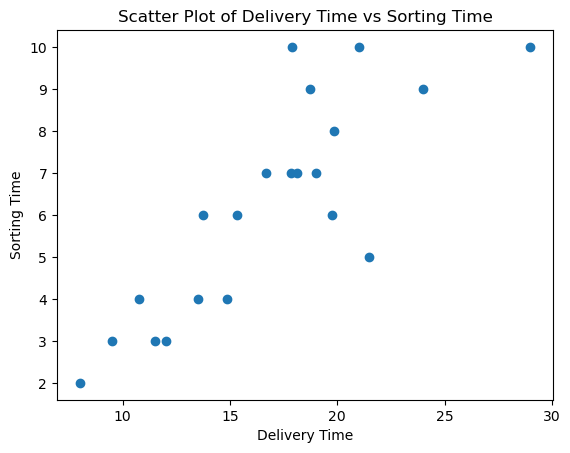

In [10]:


#'delivery_df' DataFrame containing 'Delivery Time' and 'Sorting Time' columns
plt.scatter(delivery_df['Delivery Time'], delivery_df['Sorting Time'])
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.title('Scatter Plot of Delivery Time vs Sorting Time')
plt.show()


In [11]:
 delivery_df.rename(columns={'Delivery Time':'del_time', 'Sorting Time':'sor_time'},inplace=True)

In [12]:
delivery_df          ### renaming the column 


,del_time,sor_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [13]:
delivery_df.corr()

,del_time,sor_time
del_time,1.000000,0.825997
sor_time,0.825997,1.000000


<Axes: xlabel='sor_time', ylabel='del_time'>

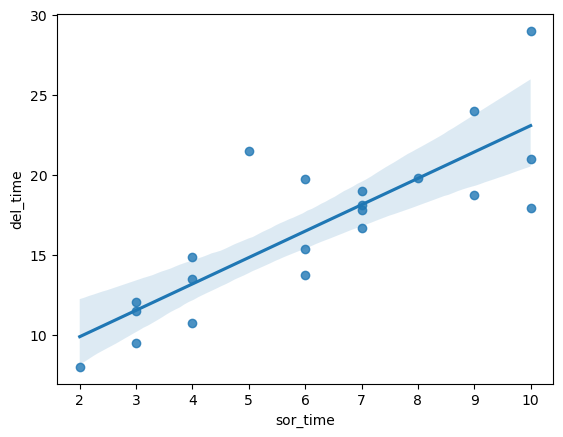

In [14]:
sns.regplot(x=delivery_df['sor_time'],y=delivery_df['del_time'])        ## creating regression plot

In [15]:
model = smf.ols("del_time ~ sor_time", data=delivery_df).fit()    ## creating model 

In [16]:
model.params   ### finding coefficient parameter

Intercept    6.582734
sor_time     1.649020
dtype: float64

In [17]:
model.tvalues , model.pvalues   ## finding t and p value 

(Intercept    3.823349
 sor_time     6.387447
 dtype: float64,
 Intercept    0.001147
 sor_time     0.000004
 dtype: float64)

In [18]:
model.rsquared , model.rsquared_adj                     ### finding r squared values / performence of the model

(0.6822714748417231, 0.6655489208860244)

In [19]:
delivery_time = (6.582734)+(1.649020)*5            ## model prediction 

In [20]:
delivery_time

14.827834

In [21]:
import pandas as pd

new_data = pd.Series([5, 8])
print(new_data)


0    5
1    8
dtype: int64


In [22]:
data_pred = pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               del_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 06 May 2024   Prob (F-statistic):           3.98e-06
Time:                        18:31:50   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
sor_time       1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
import pandas as pd
import numpy as np 
import seaborn as sns
import statsmodels.formula.api as smf 

In [25]:
dataset = pd.read_csv(r"C:\Users\Master\Documents\data science material all\Salary_Data.csv")

In [26]:
dataset


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [27]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [28]:
dataset.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [30]:
dataset.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

C:\Users\Master\AppData\Local\Temp\ipykernel_4312\1750535190.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

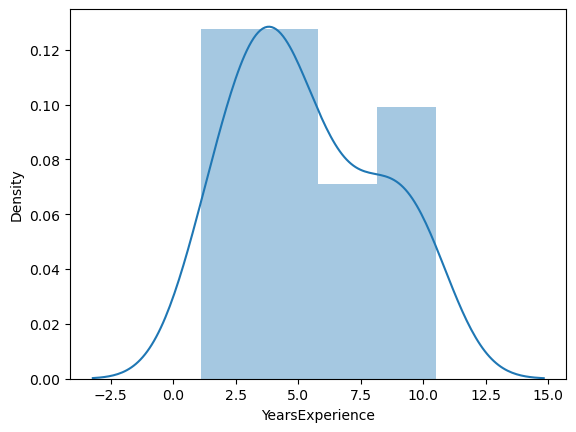

In [31]:
sns.distplot(dataset['YearsExperience'])

C:\Users\Master\AppData\Local\Temp\ipykernel_4312\3010132517.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

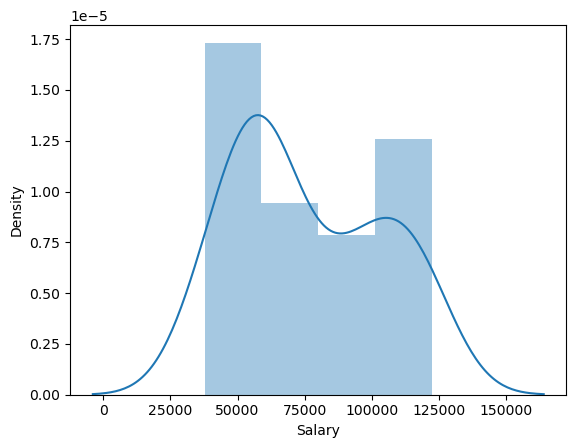

In [32]:
sns.distplot(dataset['Salary'])

In [33]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


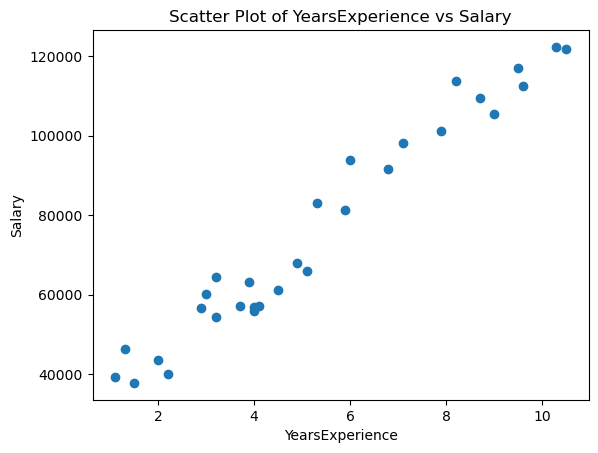

In [44]:
plt.scatter(dataset['YearsExperience'], dataset['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Scatter Plot of YearsExperience vs Salary')
plt.show()


<Axes: xlabel='YearsExperience', ylabel='Salary'>

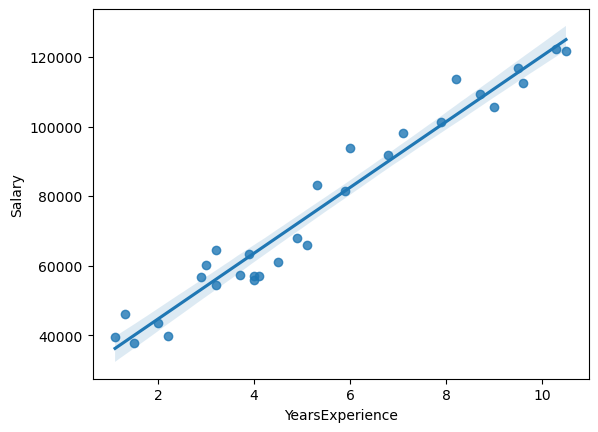

In [34]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])

In [35]:
models=smf.ols("Salary~YearsExperience",data=dataset).fit()

In [36]:
models.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [37]:
models.tvalues , models.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [38]:
models.rsquared , models.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [39]:
Salary = (25792.200199) +(9449.962321)*3
Salary

54142.087162

In [40]:
new_dataset = pd.Series([3,5])
new_dataset

0    3
1    5
dtype: int64

In [41]:
data_preds = pd.DataFrame(new_dataset,columns=["YearsExperience"])
data_preds

,YearsExperience
0,3
1,5


In [42]:
models.predict(data_preds)

0    54142.087163
1    73042.011806
dtype: float64

In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               del_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 06 May 2024   Prob (F-statistic):           3.98e-06
Time:                        18:31:52   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
sor_time       1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""